In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from ML2_lib import loss
from ML2_lib import plot_set
from ML2_lib import RV_SGDAve

In [2]:
d = 2
trial_num = 100
lr = 0.1
noise = "lognormal"
c = 1
E_var = 1.75
n = 10000
k_list = [1, 2, 4, 5, 10, 20]
son = loss.Ellipsoid(d=d, noise_type=noise, E_var=E_var)

In [3]:
def sgd_to_ave(x):
    hoge = []
    for i in range(x.shape[0]):
        if i == 0:
            hoge.append(x[0])
        else:
            hoge.append(np.mean(x[0:i+1],axis=0))
    return hoge

In [4]:
def k_sgd_to_ave(k_core_list):
    hoge = []
    for i in k_core_list:
        fuga = []
        for j in i:
            fuga.append(sgd_to_ave(j))
        hoge.append(np.array(fuga))
    return hoge

valid_loss_store [1.9783571013767156]
tmp_loss [array([1.9783571])]
0
valid_loss_store [5.879377596873175, 4.734559597242679]
tmp_loss [array([4.7345596]), array([4.7345596])]
1
valid_loss_store [8.578757809461282, 4.466918903848659, 14.273023769951267, 14.03465899427474]
tmp_loss [array([14.03465899]), array([14.03465899]), array([14.03465899]), array([14.03465899])]
1
valid_loss_store [33.02473420367892, 33.15986114183435, 22.752193502634125, 32.65549836907041, 22.977111078384585]
tmp_loss [array([22.97711108]), array([22.97711108]), array([22.97711108]), array([22.97711108]), array([22.97711108])]
2
valid_loss_store [35.100909794125215, 34.616145620276264, 34.83737222320393, 34.47074663971632, 34.41708446470764, 34.23816184108478, 34.84587449276672, 35.04853137215448, 34.268455939344655, 34.40942549807557]
tmp_loss [array([34.4094255]), array([34.4094255]), array([34.4094255]), array([34.4094255]), array([34.4094255]), array([34.4094255]), array([34.4094255]), array([34.4094255]), a

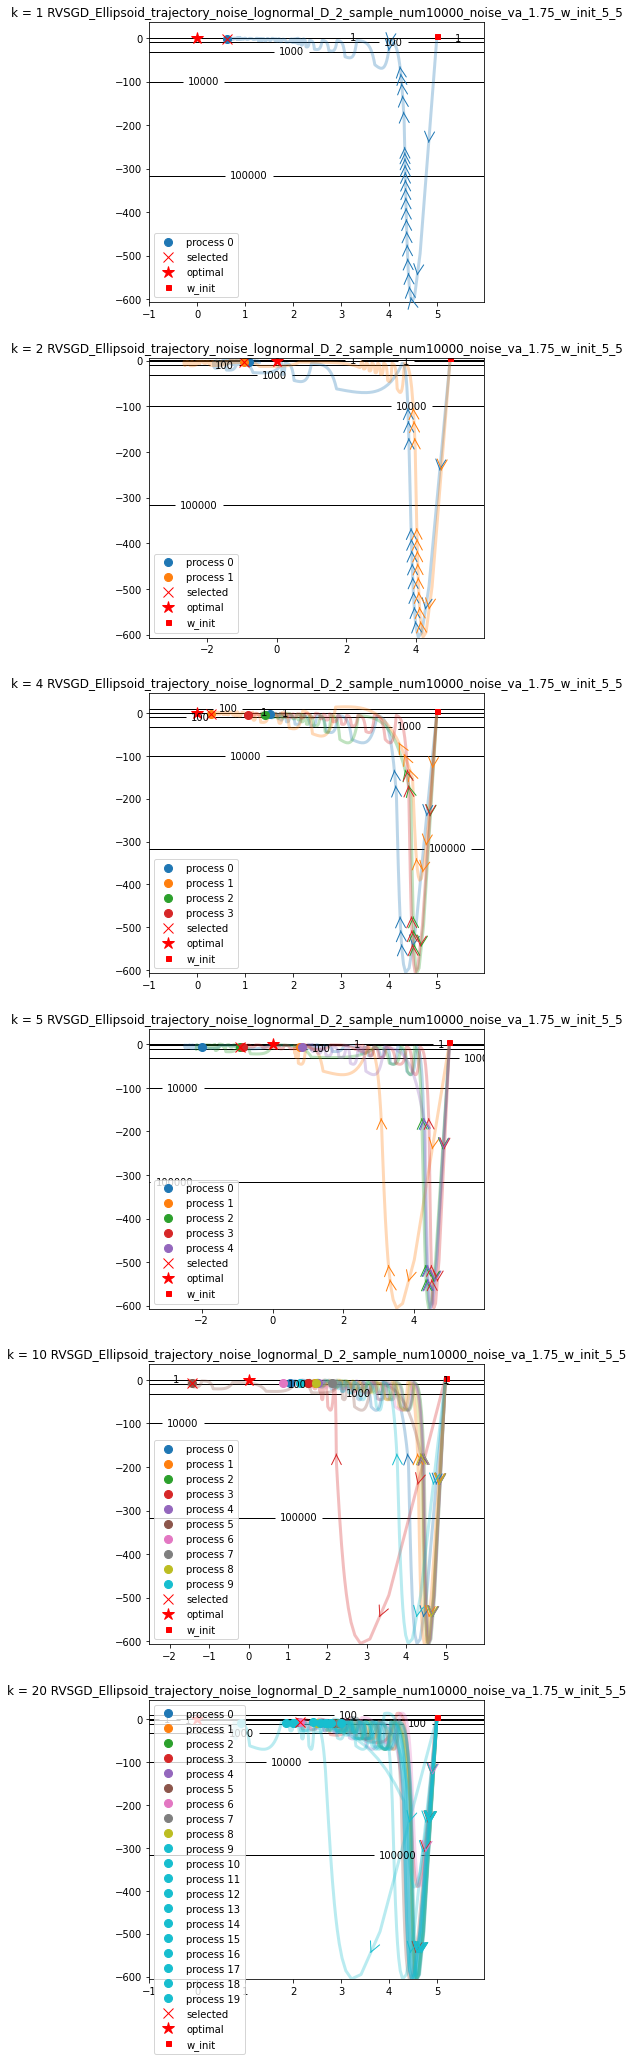

In [5]:
w_init = np.array([5, 5])

title = f"RVSGD_Ellipsoid_trajectory_noise_{noise}_D_{d}_sample_num{n}_noise_va_{E_var}_w_init_{w_init[0]}_{w_init[1]}"
RV = RV_SGDAve.RVSGDByW(model_opt=son, c=1, n=n, lr=lr)
k_core_list, k_selected_index, k_w_rv = RV.k_all_transition(k_list=k_list, w_init=w_init)
k_core_list_ave = k_sgd_to_ave(k_core_list)
plot_set.multiple_w_value_2d_k_candidates_contour(k_list=k_list, k_list_core_store=k_core_list_ave, _t_max=n,
                                                  k_selected_index=k_selected_index, f=son, levels=[1,100,1000,10000,100000],title=title,saving_png=False)



In [6]:
foo = k_sgd_to_ave(k_core_list)

In [7]:
foo

[array([[[   5.        ,    5.        ],
         [   4.64828667, -494.96364221],
         [   4.5306632 , -595.28955809],
         ...,
         [   0.62042676,   -1.30514548],
         [   0.62005245,   -1.40654069],
         [   0.61967824,   -1.48756809]]]),
 array([[[   5.        ,    5.        ],
         [   4.38743527, -494.77196002],
         [   4.18309407, -595.05958286],
         ...,
         [  -0.79955612,   -2.81807667],
         [  -0.79895521,   -2.42474266],
         [  -0.79835468,   -2.11013383]],
 
        [[   5.        ,    5.        ],
         [   4.4779265 , -494.76951603],
         [   4.30360645, -595.05661736],
         ...,
         [  -0.93345432,   -2.17504703],
         [  -0.93271695,   -2.17590412],
         [  -0.93198875,   -1.83125075]]]),
 array([[[ 5.00000000e+00,  5.00000000e+00],
         [ 4.56402939e+00, -4.94789139e+02],
         [ 4.41855570e+00, -5.95080162e+02],
         ...,
         [ 1.50743429e+00, -2.86133068e+00],
         [ 1.5076

In [8]:

k_core_list[0][0]

array([[   5.        ,    5.        ],
       [   4.29657334, -994.92728443],
       [   4.29541628, -795.94138983],
       ...,
       [  -1.25145034, -635.22487606],
       [  -1.25077854, -508.1797952 ],
       [  -1.25097595, -406.54351515]])

In [9]:
np.array(sgd_to_ave(k_core_list[0][0]))

array([[   5.        ,    5.        ],
       [   4.64828667, -494.96364221],
       [   4.5306632 , -595.28955809],
       ...,
       [   0.62042676,   -1.30514548],
       [   0.62005245,   -1.40654069],
       [   0.61967824,   -1.48756809]])

In [10]:

np.mean(k_core_list[0],axis=1)

array([[ 0.61967824, -1.48756809]])

In [11]:
hoge = np.arange(24).reshape((2,3,4))

In [12]:
np.mean(hoge,axis=0)


array([[ 6.,  7.,  8.,  9.],
       [10., 11., 12., 13.],
       [14., 15., 16., 17.]])